# Newton-Raphson in one dimension

Imagine we have the following function:

$y = x^3-2x+2$ and we want to find the solution to where our function is equal to 0. Let's look at the graph:

In [38]:
# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.patches import FancyArrowPatch

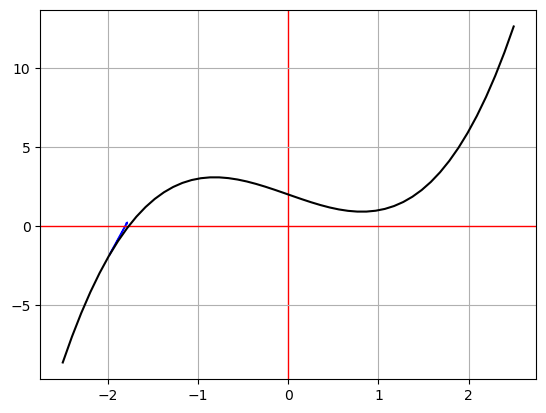

In [37]:
# describe function
x = np.linspace(-2.5, 2.5, 50)
y = (x**3) - (2*x) + 2
# Plot 
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y, 'black', label ='somefunction of x')
ax.grid()
a = ax.get_xgridlines()
b = a[3]
b.set_color('red')
b.set_linewidth(1)
c = ax.get_ygridlines()
d = c[2]
d.set_color('red')
d.set_linewidth(1)
arrow = FancyArrowPatch((-2, -2),(-1.769,0.4),    
                        arrowstyle='simple', color='b', mutation_scale=2)
ax.add_patch(arrow)

We know from looking at the graph that the point which is equal to 0 is close -2, but to find it exactly and without a graph support we use the newton-raphson method.

Lets find the gradient (the blue line, which passes through the root)

$\frac{dy}{dx} = 3x^2 -2$

and evaluate our function with our first guess of -2:

$y = x^3-2x+2$ => $y = -2^3 -2.-2 + 2 = 2$ 

so with x = -2 our y = 2 and our gradient is 10

This is the first iteration of the method, which has the following form:

$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$

and with this we find our new value of the guess (xi) equals to -1.8, and after three iterations we have xi = -1.769 which is really really close to the real solution!

But we can have some problems with this method, for instance if we have a bad first guess that is very close to our point of maxima or minima, our gradient would be really small and the formula would give us some crazy numbers!

# Gradient descent

First we need our grad vector: $D_f$, which is just a vector containing the partial derivatives of a given function:

Given function f(x,y), our $D_f$ = $\begin{bmatrix}\frac{\partial f}{\partial x} // \frac{\partial f}{\partial y}\end{bmatrix}$ (note that this is just our jacobian transposed)

We then evaluate this grad vector with some arbitrary points (a,b) and multiply by a unit vector r and we will move in the steepest descent.

And ir order to move at the maximum value it can possible have we need to dot our grad vector to its normalized form:
$D_f . \frac{D_f}{||D_f||} = ||D_f||$ and this is the size of the steepest gradient we can have, the size of our grad vector.
Remember that the grad vector points up the steepest descent (up for positives, and down for negatives)

And with this our gradient descent method is to keep doing iterations with the grad vector and keep going for the steepest descent until we reach our maxima/minima point:

$S_{n+1} = S_n - yD_f(s_n)$

We evaluate at point S_n and do a "step" with out grad vector, which is some amount (y) times $D_f(s_n)$(our grad evaluated at S_n).

One way to define this "step" is to use the hessian, so instead of using y we use $-H^{-1}J$ instead of $yJ$

We can also use a hybrid method, which tries the hessian, and if the step is too large and start pointing backward, we change to the steepest descent with an arbitrary y

# Constrained optimisation

Imagine we now want the max/minima of a given function and this function has a restriction. We can simple use a method named lagrange multiplier to find the solutions!

Since the gradient is perpendicular to the contours, the gradient of the function and the gradient of the constraint will also be parallel.

To ilustrate the method, see the following exemple:

Maximize $f(x,y) = x^2y$, and this function is contrained to: $g(x,y) = x^2 + y^2 = a^2$

If we find the gradient of both function, and multiply the gradient of the constrained function by the lagrange multiplier($\lambda$, we can find the solution, like this:

$D_f = \lambda D_g$

So let's find our solution!

We know that $D_f = 2xy, x^2$ and $G_f = 2x, 2y$, so we have the following system:

$2xy = \lambda 2x$ (1)

$x^2 = \lambda 2y$ (2)

Solving:

> (1) $\lambda = y$

> (2) $x = 2y^2 => x = +/- \sqrt{2y}$

> (3) $x^2 + y^2 = a^2 = 3y^2 => y = +/- \frac{a}{\sqrt{3}}$ 



Solutions:

$\frac{a}{\sqrt{3}} (\sqrt{2}, 1)$ (using y = 1)

$\frac{a}{\sqrt{3}} (\sqrt{2}, -1)$ (using y = -1)

$\frac{a}{\sqrt{3}} (-\sqrt{2}, 1)$ (using y = 1) (since our solution has a +/- sign)

$\frac{a}{\sqrt{3}} (-\sqrt{2}, -1)$ (using y = -1) (since our solution has a +/- sign)

*note that we can use newton-raphson to find the roots of the problem reconstructed with the lagrange multiplier to find the solution